In [1]:
import itertools
import sys,os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm


In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.2, rc={"xtick.bottom" : True, "ytick.left" : True})
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
import mdtraj as md


In [3]:
def unit_normal_vector(v1, v2):
    """Calculates the unit normal vector to a plane defined by two vectors.

    Args:
        v1: The first vector defining the plane.
        v2: The second vector defining the plane.

    Returns:
        The unit normal vector to the plane.
    """

    normal = np.cross(v1, v2, axisa=1)
    norm = np.linalg.norm(normal, axis=1).reshape(np.shape(normal)[0],1)
    normal = normal / norm
    return normal

In [4]:
gro = "../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_berendsen.gro"
xtc = "../data/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_proc.xtc"

traj_gsy = md.load_xtc(xtc, top=gro, stride=200)

In [7]:
TYR = [x.index for x in list(traj_gsy.topology.residues) if (x.name=='TYR')]
ntyr = len(TYR)

In [8]:
water_oxygen = traj_gsy.topology.select('water and name O')
tyr_sidechain = [[x.index for x in traj_gsy.topology.residue(TYR[j]).atoms if
           x.name in ['CE1', 'CE2', 'CZ', 'OH']] for j in range(len(TYR))]

In [9]:
pairs = list(itertools.product(np.concatenate(tyr_sidechain), water_oxygen))

r_yo, gr_yo = md.compute_rdf(traj_gsy, pairs=pairs[:-1], r_range=(0, 1.5), bin_width=0.01)

In [11]:
xtc = "../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_proc.xtc"
gro = "../data/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_berendsen.gro"
traj_gsf = md.load_xtc(xtc, top=gro, stride=200)

In [12]:
PHE = [x.index for x in list(traj_gsf.topology.residues) \
       if (x.name=='PHE')]
nphe = len(PHE)

In [13]:
water_oxygen = traj_gsf.topology.select('water and name O')
phe_sidechain = np.concatenate([[x.index for x in traj_gsf.topology.residue(PHE[j]).atoms if
           x.name in ['CE1', 'CE2', 'CZ']] for j in range(len(PHE))])

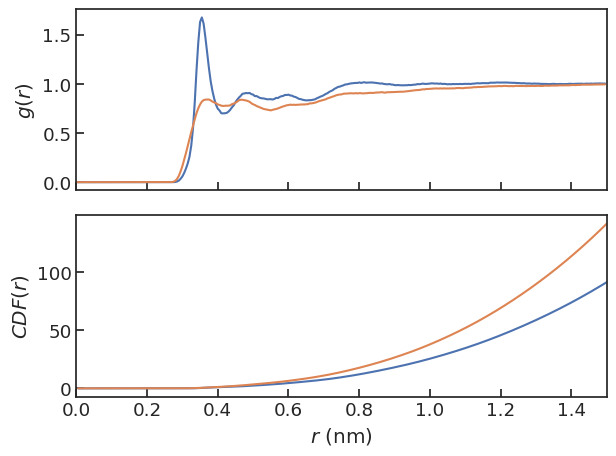

In [32]:
fig, ax = plt.subplots(2,1,sharex=True, sharey=False)
rdf = "../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_CZ_OW.xvg"
data = np.loadtxt(rdf, comments=["#", "@"]) 
ax[0].plot(data[:,0], data[:,1])

rdf = "../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_CZ_OW.xvg"
data = np.loadtxt(rdf, comments=["#", "@"]) 
ax[0].plot(data[:,0], data[:,1])

rdf = "../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_CZ_OW_cn.xvg"
data = np.loadtxt(rdf, comments=["#", "@"]) 
ax[1].plot(data[:,0], data[:,1])

rdf = "../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_CZ_OW_cn.xvg"
data = np.loadtxt(rdf, comments=["#", "@"]) 
ax[1].plot(data[:,0], data[:,1])

ax[0].set_xlim(0,1.5)
ax[1].set_xlabel(r'$r$ (nm)')
ax[0].set_ylabel('$g(r)$')
ax[1].set_ylabel('$CDF(r)$')
plt.tight_layout()

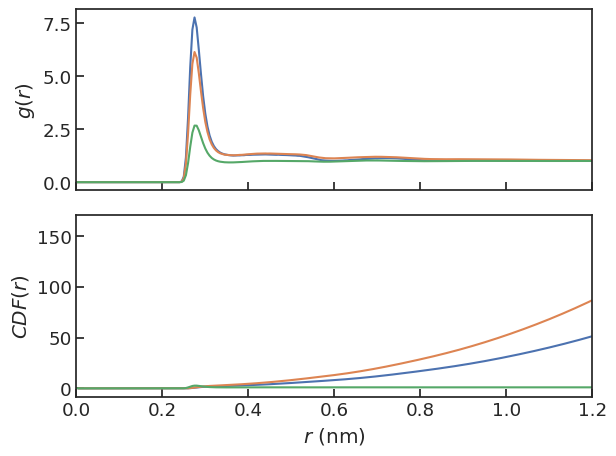

In [51]:
fig, ax = plt.subplots(2,1,sharex=True, sharey=False)
rdf = "../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_OW_OW.xvg"
data = np.loadtxt(rdf, comments=["#", "@"]) 
ax[0].plot(data[:,0], data[:,1])
data = np.loadtxt("../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_OW_OW.xvg", comments=["#", "@"]) 
ax[0].plot(data[:,0], data[:,1])

data = np.loadtxt("../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_OW_OW_cn.xvg", comments=["#", "@"]) 
ax[1].plot(data[:,0], data[:,1])
data = np.loadtxt("../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_OW_OW_cn.xvg", comments=["#", "@"]) 
ax[1].plot(data[:,0], data[:,1])

data = np.loadtxt("../analysis/rdf_h2o_OWOW.xvg", comments=["#", "@"]) 
ax[0].plot(data[:,0], data[:,1])
data = np.loadtxt("../analysis/rdf_h2o_OWOW_cn.xvg", comments=["#", "@"]) 
ax[1].plot(data[:,0], data[:,1])
ax[0].set_xlim(0,1.2)
ax[1].set_xlabel(r'$r$ (nm)')
ax[0].set_ylabel('$g(r)$')
ax[1].set_ylabel('$CDF(r)$')

plt.tight_layout()


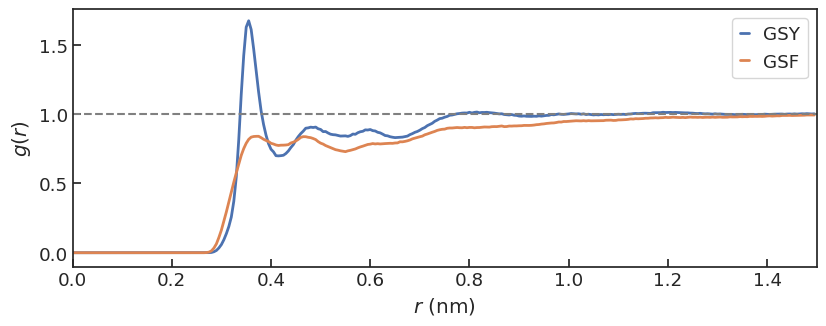

In [45]:
fig, ax = plt.subplots(figsize=(8.5,3.5))
data = np.loadtxt("../analysis/soup_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_CZ_OW.xvg", comments=["#", "@"]) 
ax.plot(data[:,0], data[:,1], lw=2, label='GSY')
data = np.loadtxt("../analysis/soupF_XXL_amber99sb-star-ildnTRUE_tip3p_dense_npt_rdf_CZ_OW.xvg", comments=["#", "@"]) 
ax.plot(data[:,0], data[:,1], lw=2, label='GSF')
ax.axhline(1, color='gray', lw=1.5, ls='--')
ax.set_xlim(0,1.5)
ax.set_ylim(-0.1,)
ax.set_xlabel(r'$r$ (nm)')
ax.set_ylabel('$g(r)$')
plt.legend( handlelength=.5)
plt.tight_layout()
#plt.savefig("figures/gr.png", dpi=300, transparent=True)

## 2D plots

In [52]:
# Get indexes for the first three atoms in the ring
CG = [x.index for x in list(traj_gsy.topology.atoms) \
       if (x.name=='CG' and x.residue.name =='TYR')]
CD1 = [x.index for x in list(traj_gsy.topology.atoms) \
       if (x.name=='CD1' and x.residue.name =='TYR')]
CD2 = [x.index for x in list(traj_gsy.topology.atoms) \
       if (x.name=='CD2' and x.residue.name =='TYR')]

In [53]:
# Get vectors normal to the plane
normal = []
for i,j,k in list(zip(CG,CD1,CD2)):
    # calculate bond vectors
    displacements = md.compute_displacements(traj_gsy, [[i,j], [i,k]])
    # calculate normal vectors
    normal.append(unit_normal_vector(displacements[:,0,:], displacements[:,1,:]))

In [54]:
# Find atoms from carboxyl groups in peptide bonds
H1= [x.index for x in list(traj_gsy.topology.atoms) \
       if (x.name=='H1' and x.residue.name == 'HOH')]
O = [x.index for x in list(traj_gsy.topology.atoms) \
       if (x.name=='O' and x.residue.name == 'HOH')]
H2= [x.index for x in list(traj_gsy.topology.atoms) \
       if (x.name=='H2' and x.residue.name == 'HOH')]
wat = list(zip(H1,O,H2))
n_wat = len(wat)

In [55]:
n_wat = len(wat)
wat_tyr_dist = []
for i,j in itertools.product(range(n_wat), range(ntyr)):
    i_index = wat[i]
    j_index =  [x.index for x in traj_gsy.topology.residue(TYR[j]).atoms if
           x.name in ['CE1', 'CE2', 'CZ', 'OH']]
    wat_tyr_dist.append(np.median(md.compute_distances(traj_gsy, \
                                    list(itertools.product(i_index, j_index))), axis=1))

In [56]:
# Get vectors normal to the water plane
wat_normal = []
for i,j,k in wat:
    # calculate OH bond vectors
    displacements = md.compute_displacements(traj_gsy, [[i,j], [k,j]])
    # calculate normal vectors
    wat_normal.append(unit_normal_vector(displacements[:,0,:], displacements[:,1,:]))
    
#  Get angle between vectors
angle_water_tyr = []
for i,j in itertools.product(range(n_wat), range(ntyr)):
    angle_water_tyr.append(np.arccos((wat_normal[i]*normal[j]).sum(1)))


In [57]:
sel = np.array(wat_tyr_dist) < 0.65
np.shape(wat_tyr_dist), np.shape(np.array(angle_water_tyr))

((52900, 51), (52900, 51))

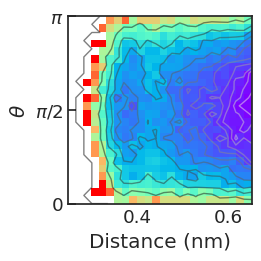

In [58]:
fig, ax = plt.subplots(figsize=(2.85, 2.85))
nbins=25
counts, xbins, ybins, image = ax.hist2d(np.array(wat_tyr_dist)[sel], np.array(angle_water_tyr)[sel], \
                                        bins=(np.linspace(0.25,0.65,nbins), np.linspace(0,np.pi,nbins)), \
                                        norm=LogNorm(), cmap='rainbow_r')
ax.contour(counts.T, levels=10, extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()], \
           linewidths=1, cmap='binary_r', alpha=0.5)
ax.set_yticks(np.linspace(0,np.pi,3)); ax.set_yticklabels([0, r"$\pi/2$", r"$\pi$"])        
ax.set_xlabel('Distance (nm)')
ax.set_ylabel(r'$\theta$')
plt.tight_layout()
#plt.savefig("figures/gsf_h2opi_dist.png", dpi=300, transparent=True)


In [59]:
# Get indexes for the first three atoms in the ring
CG = [x.index for x in list(traj_gsf.topology.atoms) \
       if (x.name=='CG' and x.residue.name =='PHE')]
CD1 = [x.index for x in list(traj_gsf.topology.atoms) \
       if (x.name=='CD1' and x.residue.name =='PHE')]
CD2 = [x.index for x in list(traj_gsf.topology.atoms) \
       if (x.name=='CD2' and x.residue.name =='PHE')]

In [60]:
# Get vectors normal to the plane
normal = []
for i,j,k in list(zip(CG,CD1,CD2)):
    # calculate bond vectors
    displacements = md.compute_displacements(traj_gsf, [[i,j], [i,k]])
    # calculate normal vectors
    normal.append(unit_normal_vector(displacements[:,0,:], displacements[:,1,:]))

In [61]:
# Find atoms from carboxyl groups in peptide bonds
H1= [x.index for x in list(traj_gsf.topology.atoms) \
       if (x.name=='H1' and x.residue.name == 'HOH')]
O = [x.index for x in list(traj_gsf.topology.atoms) \
       if (x.name=='O' and x.residue.name == 'HOH')]
H2= [x.index for x in list(traj_gsf.topology.atoms) \
       if (x.name=='H2' and x.residue.name == 'HOH')]
wat = list(zip(H1,O,H2))
n_wat = len(wat)

In [62]:
wat_phe_dist = []
for i,j in itertools.product(range(n_wat), range(nphe)):
    i_index = wat[i]
    j_index =  [x.index for x in traj_gsf.topology.residue(PHE[j]).atoms if
           x.name in ['CE1', 'CE2', 'CZ']]
    wat_phe_dist.append(np.median(md.compute_distances(traj_gsf, \
                                    list(itertools.product(i_index, j_index))), axis=1))

In [63]:
# Get vectors normal to the water plane
wat_normal = []
for i,j,k in wat:
    # calculate OH bond vectors
    displacements = md.compute_displacements(traj_gsf, [[i,j], [k,j]])
    # calculate normal vectors
    wat_normal.append(unit_normal_vector(displacements[:,0,:], displacements[:,1,:]))
    
#  Get angle between vectors
angle_water_phe = []
for i,j in itertools.product(range(n_wat), range(nphe)):
    angle_water_phe.append(np.arccos((wat_normal[i]*normal[j]).sum(1)))

In [64]:
sel = np.array(wat_phe_dist) < 0.65
np.shape(wat_phe_dist), np.shape(np.array(angle_water_phe))

((106082, 51), (106082, 51))

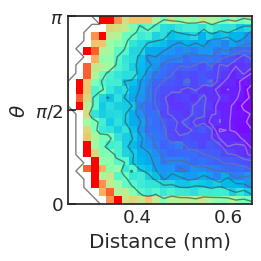

In [65]:
fig, ax = plt.subplots(figsize=(2.85, 2.85))
nbins=25
counts, xbins, ybins, image = ax.hist2d(np.array(wat_phe_dist)[sel], np.array(angle_water_phe)[sel], \
                                        bins=(np.linspace(0.25,0.65,nbins), np.linspace(0,np.pi,nbins)), \
                                        norm=LogNorm(), cmap='rainbow_r')
ax.contour(counts.T, levels=10, extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()], \
           linewidths=1, cmap='binary_r', alpha=0.5)
ax.set_yticks(np.linspace(0,np.pi,3)); ax.set_yticklabels([0, r"$\pi/2$", r"$\pi$"])        
ax.set_xlabel('Distance (nm)')
ax.set_ylabel(r'$\theta$')
plt.tight_layout()
#plt.savefig("figures/gsf_h2opi_dist.png", dpi=300, transparent=True)
